<center>
<img src="https://oroszl.web.elte.hu/tmp/springs.png"></img> 
</center>

In [1]:
import numpy as np
from scipy.integrate import *
from numpy.fft import *
import matplotlib.pyplot as plt

In [2]:
def func(X,t):
    N=int(len(X)/2)
    k=1
    m=1

    #A bemenetként kapott array fele a kitérések, fele a sebességek:
    x=np.array(X[:N])
    v=np.array(X[N:2*N])
        
    D = (k/m) * ( np.diag([-2]*N) + np.diag([1]*(N-1),1) + np.diag([1]*(N-1),-1) )
    
    a = D@x
    
    U=np.zeros(2*N)
    
    for i in range(N):
        #A kimenet is olyan formában legyen, mint a bemenet:
        U[i]=v[i] 
        U[N+i]=a[i]

    return(U)

In [3]:
n=100

In [4]:
X0=np.array([0 for i in range(2*n)])
X0[n]=1
#Kezdeti feltételek.

In [5]:
t1=100
N=100
t=np.linspace(0,t1,N)

In [6]:
u=odeint(func,X0,t)
#diffegy megoldása

In [7]:
x=u[:,:n]
v=u[:,n:2*n]
#A megoldás szétbontva

Text(0.5, 0, 'Idő')

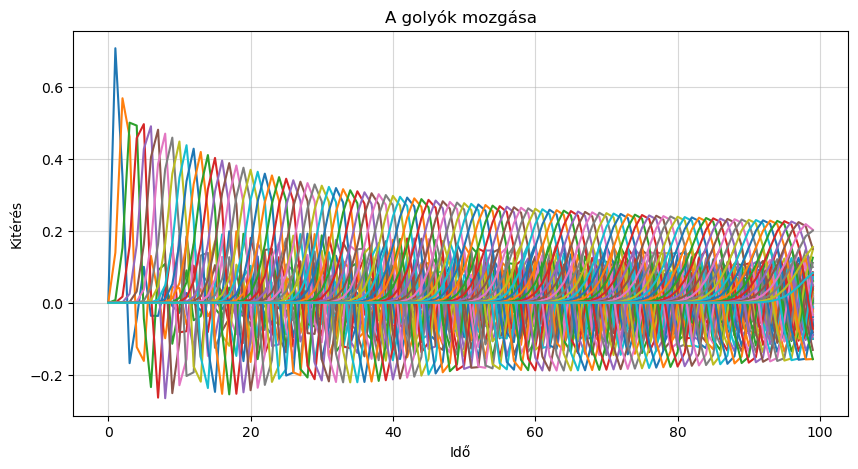

In [8]:
fig,ax=plt.subplots(figsize=(10,5))
for i in range(x.shape[1]):
    plt.plot(range(x.shape[0]), x[:,i])
plt.grid(alpha=0.5)
plt.title('A golyók mozgása')
plt.ylabel('Kitérés')
plt.xlabel('Idő')


In [9]:
x_abs=np.abs(x)

Text(0.5, 0, 'Idő')

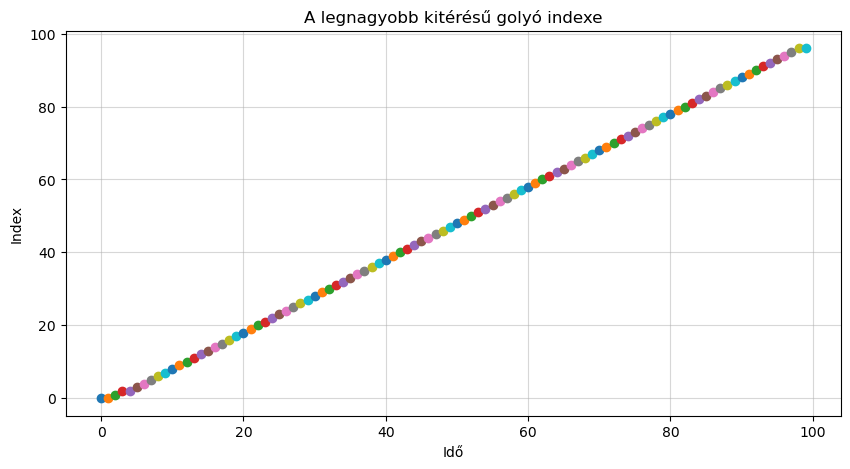

In [10]:
fig,ax=plt.subplots(figsize=(10,5))
for j in range (x_abs.shape[0]):
    k=np.argmax(x_abs[j,:])
    plt.plot(j,k, marker='o')
plt.grid(alpha=0.5)
plt.title('A legnagyobb kitérésű golyó indexe')
plt.ylabel('Index')
plt.xlabel('Idő')


In [29]:
#FFT a kitérésekre: időben és térben is

x_fft=np.abs(fft(ifft(x, axis=0),axis=1))
omega=np.abs(2*np.pi*fftfreq(len(t),t[1]-t[0]))
k=fftfreq(x.shape[1],1)

In [30]:
v_fft=np.abs(fft(ifft(v, axis=0),axis=1))

/tmp/ipykernel_1160/2855025128.py:2: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(k,omega,x_fft, cmap='Purples')


Text(0.5, 1.0, '$\\omega (k)$')

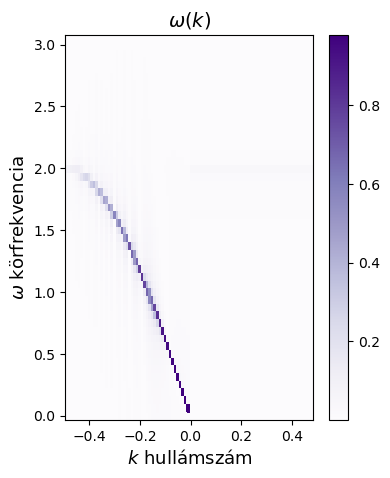

In [38]:
fig, axs = plt.subplots(figsize=(4, 5))
plt.pcolor(k,omega,x_fft, cmap='Purples')
plt.colorbar()
plt.ylabel(r'$\omega$ körfrekvencia', size=13)
plt.xlabel(r'$k$ hullámszám', size=13)
plt.title(r'$\omega (k)$', size=14)

/tmp/ipykernel_1160/208439686.py:2: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(k,omega,v_fft, cmap='Purples')


Text(0.5, 1.0, 'Phonon spektrum')

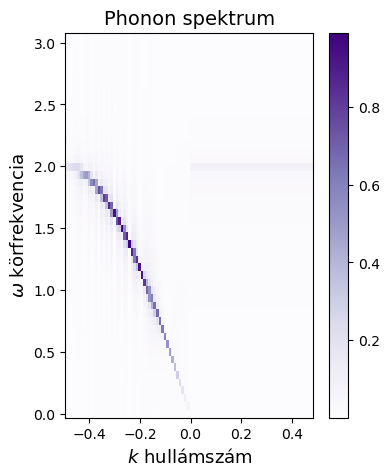

In [41]:
fig, axs = plt.subplots(figsize=(4, 5))
plt.pcolor(k,omega,v_fft, cmap='Purples')
plt.colorbar()
plt.ylabel(r'$\omega$ körfrekvencia', size=13)
plt.xlabel(r'$k$ hullámszám', size=13)
plt.title(r'Phonon spektrum', size=14)